In [ ]:
pip install yfinance

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf


In [11]:
ativos = ['ABEV3.SA', 'PETR4.SA', 'VALE3.SA', 'BRFS3.SA', 'ALUP4.SA']

data_inicio = pd.to_datetime('2019-01-01')
data_fim = pd.to_datetime('2023-01-01')

#Portifolio 1/n
pesos = np.array([0.2,0.2,0.2,0.2,0.2])

In [12]:
portifolio = yf.download(ativos, start = data_inicio, end = data_fim)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [14]:
portifolio.head()

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-02,13.950427,4.629724,22.379999,9.896700,36.257858
2019-01-03,14.105909,4.701563,21.490000,10.139385,34.774616
2019-01-04,14.295948,4.549901,21.450001,10.168179,37.038513
2019-01-07,14.235481,4.629724,21.590000,10.328600,36.839798
2019-01-08,13.950427,4.645688,22.930000,10.266900,37.194645


In [15]:
#Calcula a porcentagem de retorno de cada ativo por dia
retornos = portifolio.pct_change().dropna()
retornos

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,0.011145,0.015517,-0.039768,0.024522,-0.040908
2019-01-04,0.013472,-0.032258,-0.001861,0.002840,0.065102
2019-01-07,-0.004230,0.017544,0.006527,0.015777,-0.005365
2019-01-08,-0.020024,0.003448,0.062066,-0.005974,0.009632
2019-01-09,0.014241,-0.003436,0.027039,0.020833,0.024423
...,...,...,...,...,...
2022-12-23,0.013870,0.009751,0.035813,0.047103,0.006647
2022-12-26,-0.006840,0.013948,-0.010638,-0.007166,0.009152
2022-12-27,0.000000,-0.026455,-0.033602,0.006816,0.023878


<AxesSubplot: xlabel='Date'>

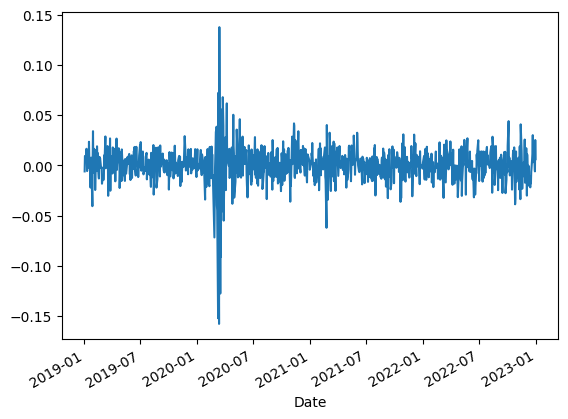

In [23]:
# Media ponderada de acordo com os pesos
retorno_medio = (retornos*pesos).sum(axis=1)

# Transformando em Serie Temporal
retorno_carteira = pd.Series(retorno_medio, name="Portifolio")

# Retorno Diario do portifolio
retorno_carteira.plot()


In [30]:

retorno_acumulado = (1+retornos)
#retorno_acumulado = (1+retornos).cumprod()
retorno_acumulado.plot()

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,1.011145,1.015517,0.960232,1.024522,0.959092
2019-01-04,1.024768,0.982758,0.958445,1.027431,1.021531
2019-01-07,1.020433,1.000000,0.964701,1.043641,1.016050
2019-01-08,1.000000,1.003448,1.024576,1.037406,1.025837
2019-01-09,1.014241,1.000000,1.052279,1.059019,1.050890
...,...,...,...,...,...
2022-12-23,1.047997,1.836547,0.336014,2.271198,2.329566
2022-12-26,1.040828,1.862164,0.332440,2.254923,2.350886
2022-12-27,1.040828,1.812901,0.321269,2.270294,2.407020


In [28]:
retornos

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,0.011145,0.015517,-0.039768,0.024522,-0.040908
2019-01-04,0.013472,-0.032258,-0.001861,0.002840,0.065102
2019-01-07,-0.004230,0.017544,0.006527,0.015777,-0.005365
2019-01-08,-0.020024,0.003448,0.062066,-0.005974,0.009632
2019-01-09,0.014241,-0.003436,0.027039,0.020833,0.024423
...,...,...,...,...,...
2022-12-23,0.013870,0.009751,0.035813,0.047103,0.006647
2022-12-26,-0.006840,0.013948,-0.010638,-0.007166,0.009152
2022-12-27,0.000000,-0.026455,-0.033602,0.006816,0.023878
